In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [96]:
df = pd.read_csv('/home/firh/Documents/GitHub/Kel-PPM-E/Dataset/dropped_chirosis.csv', sep=';')
fitur_terpilih = ['Prothrombin', 'Copper', 'Bilirubin']
df_cluster = df[fitur_terpilih]
df_firhan = df_cluster.iloc[[73, 77, 79, 82, 84, 86, 87, 88, 89, 90, 74, 75, 76, 78, 80, 81, 83, 85, 91, 92]]
df_firhan = df_firhan.reset_index()
df_firhan = df_firhan.rename(columns={'index' : 'Data'})

<Axes: >

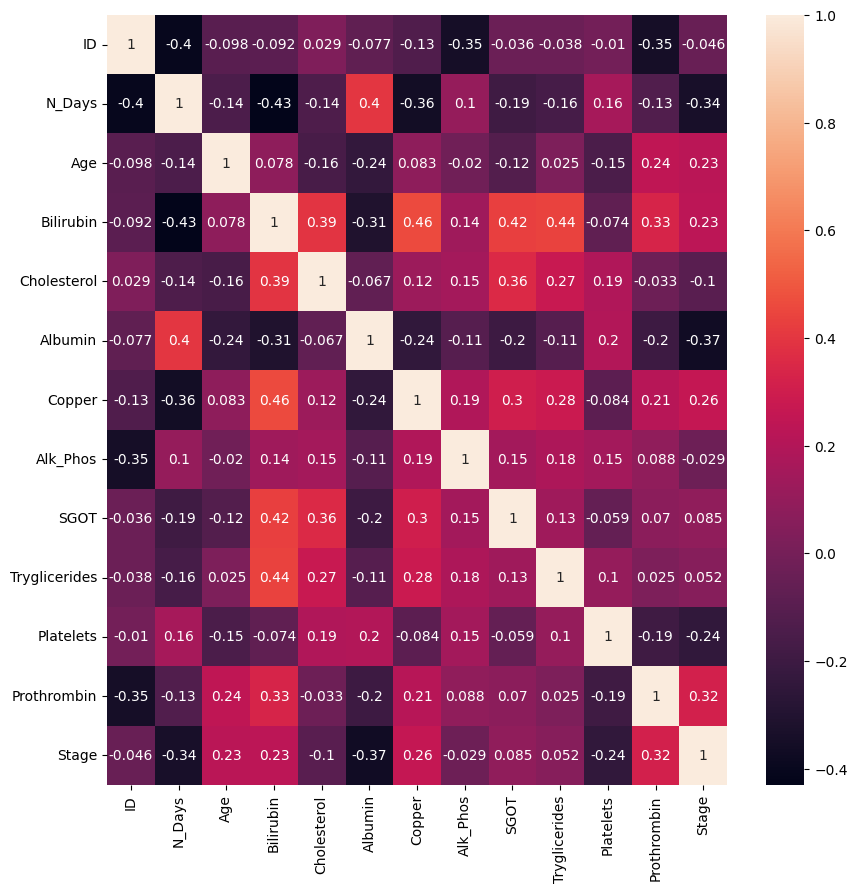

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [98]:
# Pembuatan Kelompok
df_firhan.insert(len(df_firhan.columns),"Kelompok 1", np.nan)
df_firhan.insert(len(df_firhan.columns),"Kelompok 2", np.nan)
df_firhan.insert(len(df_firhan.columns),"Kelompok 3", np.nan)


In [99]:
import random
for row in range (len(df_firhan)) :
    df_firhan[f'Kelompok {random.randint(1,3)}'].iloc[[row]] = 'X'

/tmp/ipykernel_35077/752982633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firhan[f'Kelompok {random.randint(1,3)}'].iloc[[row]] = 'X'
/tmp/ipykernel_35077/752982633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firhan[f'Kelompok {random.randint(1,3)}'].iloc[[row]] = 'X'
/tmp/ipykernel_35077/752982633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firhan[f'Kelompok {random.randint(1,3)}'].iloc[[row]] = 'X'


In [100]:
df_firhan

,Data,Prothrombin,Copper,Bilirubin,Kelompok 1,Kelompok 2,Kelompok 3
0,73,11.2,29.0,0.4,X,NaN,NaN
1,77,12.0,37.0,0.6,NaN,X,NaN
2,79,11.0,94.0,1.6,NaN,X,NaN
3,82,11.1,73.0,1.3,NaN,NaN,X
4,84,11.4,62.0,2.0,NaN,NaN,X
5,86,10.2,148.0,1.8,X,NaN,NaN
6,87,12.0,145.0,2.3,NaN,X,NaN
7,88,10.4,31.0,0.9,NaN,NaN,X
8,89,10.1,172.0,0.9,NaN,X,NaN
9,90,11.1,57.0,2.5,NaN,NaN,X


In [101]:
df_firhan.loc[df_firhan['Kelompok 2'] == 'X']

,Data,Prothrombin,Copper,Bilirubin,Kelompok 1,Kelompok 2,Kelompok 3
1,77,12.0,37.0,0.6,NaN,X,NaN
2,79,11.0,94.0,1.6,NaN,X,NaN
6,87,12.0,145.0,2.3,NaN,X,NaN
8,89,10.1,172.0,0.9,NaN,X,NaN
10,74,11.5,58.0,2.1,NaN,X,NaN
12,76,10.7,75.0,1.1,NaN,X,NaN
15,81,12.2,36.0,1.4,NaN,X,NaN


In [102]:
k1 = {}
for fitur in fitur_terpilih :
    k1[f'Centroid {fitur}'] = df_firhan.loc[df_firhan['Kelompok 1'] == 'X'][fitur].sum() / len(df_firhan.loc[df_firhan['Kelompok 1'] == 'X'])

k2 = {}
for fitur in fitur_terpilih :
    k2[f'Centroid {fitur}'] = df_firhan.loc[df_firhan['Kelompok 2'] == 'X'][fitur].sum() / len(df_firhan.loc[df_firhan['Kelompok 1'] == 'X'])

k3 = {}
for fitur in fitur_terpilih :
    k3[f'Centroid {fitur}'] = df_firhan.loc[df_firhan['Kelompok 3'] == 'X'][fitur].sum() / len(df_firhan.loc[df_firhan['Kelompok 1'] == 'X'])

In [103]:
df_centroids = pd.DataFrame([k1,k2,k3])
df_centroids = df_centroids.reset_index()
df_centroids = df_centroids.rename(columns={'index' : 'Kelompok'})
df_centroids['Kelompok'] = [1,2,3]

In [104]:
df_centroids

,Kelompok,Centroid Prothrombin,Centroid Copper,Centroid Bilirubin
0,1,10.900,81.25,2.075
1,2,19.875,154.25,2.500
2,3,24.850,155.75,4.750


In [146]:
df_centroids.to_excel('Step 2.xlsx')

In [107]:
df_iterate = df_firhan.copy()
df_iterate = df_iterate.rename(columns={'Kelompok 1' : 'Jarak ke K1', 'Kelompok 2' : 'Jarak ke K2', 'Kelompok 3' : 'Jarak ke K3'})
df_iterate.insert(len(df_iterate.columns),"Min", np.nan)
df_iterate.insert(len(df_iterate.columns),"K Baru", np.nan)
df_iterate.insert(len(df_iterate.columns),"K Lama", np.nan)

In [109]:
import math
def euclidean_distance(f1, f2, f3, c1, c2, c3) :
    return math.sqrt(((f1 - c1)**2) + ((f2 - c2) ** 2) + ((f3 - c3) ** 3))

In [110]:
df_centroids.iloc[1]

Kelompok                  2.000
Centroid Prothrombin     19.875
Centroid Copper         154.250
Centroid Bilirubin        2.500
Name: 1, dtype: float64

In [114]:
df_iterate

,Data,Prothrombin,Copper,Bilirubin,Jarak ke K1,Jarak ke K2,Jarak ke K3,Min,K Baru,K Lama
0,73,11.2,29.0,0.4,X,NaN,NaN,NaN,NaN,NaN
1,77,12.0,37.0,0.6,NaN,X,NaN,NaN,NaN,NaN
2,79,11.0,94.0,1.6,NaN,X,NaN,NaN,NaN,NaN
3,82,11.1,73.0,1.3,NaN,NaN,X,NaN,NaN,NaN
4,84,11.4,62.0,2.0,NaN,NaN,X,NaN,NaN,NaN
5,86,10.2,148.0,1.8,X,NaN,NaN,NaN,NaN,NaN
6,87,12.0,145.0,2.3,NaN,X,NaN,NaN,NaN,NaN
7,88,10.4,31.0,0.9,NaN,NaN,X,NaN,NaN,NaN
8,89,10.1,172.0,0.9,NaN,X,NaN,NaN,NaN,NaN
9,90,11.1,57.0,2.5,NaN,NaN,X,NaN,NaN,NaN


In [139]:
df_iterate['Jarak ke K1'] = df_iterate.apply(
    lambda x : euclidean_distance(x['Prothrombin'], x['Copper'], x['Bilirubin'], 
                                  df_centroids.iloc[0]['Centroid Prothrombin'],
                                  df_centroids.iloc[0]['Centroid Copper'],
                                  df_centroids.iloc[0]['Centroid Bilirubin']), axis=1)

df_iterate['Jarak ke K2'] = df_iterate.apply(
    lambda x : euclidean_distance(x['Prothrombin'], x['Copper'], x['Bilirubin'], 
                                  df_centroids.iloc[1]['Centroid Prothrombin'],
                                  df_centroids.iloc[1]['Centroid Copper'],
                                  df_centroids.iloc[1]['Centroid Bilirubin']), axis=1)

df_iterate['Jarak ke K3'] = df_iterate.apply(
    lambda x : euclidean_distance(x['Prothrombin'], x['Copper'], x['Bilirubin'], 
                                  df_centroids.iloc[2]['Centroid Prothrombin'],
                                  df_centroids.iloc[2]['Centroid Copper'],
                                  df_centroids.iloc[2]['Centroid Bilirubin']), axis=1)

df_iterate['Min'] = df_iterate.apply(lambda x : min([x['Jarak ke K1'], x['Jarak ke K2'], x['Jarak ke K3']]), axis=1)
df_iterate['K Baru'] = df_iterate.apply(lambda x : [x['Jarak ke K1'], x['Jarak ke K2'], x['Jarak ke K3']].index(min([x['Jarak ke K1'], x['Jarak ke K2'], x['Jarak ke K3']]))+1, axis=1)
df_iterate['K Lama'] = [1,2,2,3,3,1,2,3,2,3,2,3,2,3,1,2,3,3,3,1]

In [147]:
df_iterate.to_excel('Step 3.xlsx')

In [149]:
df.to_excel('Original Data.xlsx')

In [143]:
df_iterate.groupby('K Baru').mean()

,Data,Prothrombin,Copper,Bilirubin,Jarak ke K1,Jarak ke K2,Jarak ke K3,Min,K Lama
K Baru,,,,,,,,,
1,81.5625,11.150,57.625,1.81875,28.934742,97.057939,98.972770,28.934742,2.3125
2,86.2500,11.025,160.750,2.05000,79.504806,17.226358,19.604048,17.226358,2.0000


In [ ]:
df_iterate['K Baru'] = df_iterate.apply()

In [145]:
df_firhan.to_excel('Step 1.xlsx')
df